## Project 1: World Progress

This project is inspired by the UC Berkeley Foundations of Data Science course, and I will explore the same data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

Very informative and interesting presentation from him:
- [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) 
- [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

In [2]:
# Let's get started
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this section, I will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. 

**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in October 2021.

In [3]:
population = Table.read_table('population_updated.csv')
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


### Overview

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard.

In [4]:
# get a overview from 1970 through 2020 (including both 1970 and 2020)
pop_all = population.where("time",are.between(1970,2021))
pop_all.set_format('population_total', NumberFormatter)

# in order to run faster, let's check every five years.
fives = np.arange(1970, 2021, 5) # 1970, 1975, 1980, ...
five_all = pop_all.sort('time').where('time', are.contained_in(fives))

# array that contains the population for every five year interval from 1970 to 2015.
initial_all = five_all.where('time', are.contained_in(np.arange(1970, 2016, 5) )).column("population_total")

# array that contains the population for every five year interval from 1975 to 2020.
changed_all = five_all.where('time', are.contained_in(np.arange(1975, 2021, 5) )).column("population_total")

# get annual growth rate from 1970 to 2015
all_1970_through_2020 = five_all.where('time', are.below_or_equal_to(2015)) 

five_growth = all_1970_through_2020.with_column('annual_growth', (changed_all/initial_all)**0.2-1)
five_growth.set_format('annual_growth', PercentFormatter).show(5)

geo,time,population_total,annual_growth
afg,1970,"11,173,654",2.58%
ago,1970,"5,890,360",3.58%
alb,1970,"2,150,704",2.32%
and,1970,"24,275",4.81%
are,1970,"234,512",18.51%


In [6]:
# Create a drop-down menu to compare the annual growth rates of any two countries

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def geo(geo1, geo2):
    geo1_table = five_growth.where('geo', geo1).drop('geo',"population_total").relabeled(1, 'annual growth rate in {}'.format(geo1))
    geo2_table = five_growth.where('geo', geo2).drop('geo',"population_total").relabeled(1, 'annual growth rate in {}'.format(geo2))
    g1_g2 = geo1_table.join('time', geo2_table)
    g1_g2.plot('time')
    plots.show()

geos_array = five_growth.group('geo').column('geo')

# I am from Taiwan and live in the United States now, so I set the initial value to these two countries
_ = interact(geo,
             geo1=widgets.Dropdown(options=list(geos_array),value='usa'),
             geo2=widgets.Dropdown(options=list(geos_array),value='twn')
            )


interactive(children=(Dropdown(description='geo1', index=186, options=('afg', 'ago', 'alb', 'and', 'are', 'arg…

### Taiwan

I will begin by taking a close look at Taiwan 

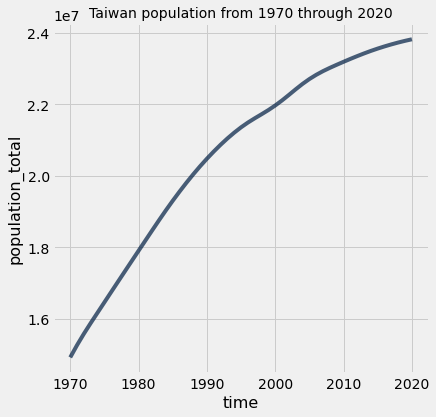

In [5]:
tw_pop_all = population.where("time",are.between(1970,2021)).where("geo", are.equal_to("twn")).drop(0)
tw_pop_all.set_format('population_total', NumberFormatter)
tw_pop_all.plot("time")
plots.title(label="Taiwan population from 1970 through 2020", fontsize=14)
plots.show()

In [6]:
# in order to run faster, let's check every five years.
fives = np.arange(1970, 2021, 5) # 1970, 1975, 1980, ...
tw_five = tw_pop_all.sort('time').where('time', are.contained_in(fives))

# array that contains the population for every five year interval from 1970 to 2015.
tw_initial = tw_five.where('time', are.contained_in(np.arange(1970, 2016, 5) )).column("population_total")

# array that contains the population for every five year interval from 1975 to 2020.
tw_changed = tw_five.where('time', are.contained_in(np.arange(1975, 2021, 5) )).column("population_total")

# get annual growth rate from 1970 to 2015
tw_1970_through_2020 = tw_five.where('time', are.below_or_equal_to(2015)) 

tw_five_growth = tw_1970_through_2020.with_column('annual_growth', (tw_changed/tw_initial)**0.2-1)
tw_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"14,924,462",1.98%
1975,"16,464,929",1.69%
1980,"17,905,459",1.51%
1985,"19,303,402",1.19%
1990,"20,478,516",0.84%
1995,"21,356,025",0.57%
2000,"21,966,528",0.66%
2005,"22,705,719",0.42%
2010,"23,187,556",0.32%
2015,"23,557,473",0.22%


Taiwan’s annual growth rate continued to decline from 1970 to 2015. Let's look at some other information in order to develop a possible explanation. 

In [7]:
life_expectancy = Table.read_table('life_expectancy_updated.csv').where("time",are.below_or_equal_to(2020))
child_mortality = Table.read_table('child_mortality_updated.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where("time",are.below_or_equal_to(2020))
fertility = Table.read_table('fertility_updated.csv').where("time",are.below_or_equal_to(2020))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

In [8]:
life_expectancy.show(5)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19
afg,1803,28.18
afg,1804,28.17


In [9]:
child_mortality.show(5)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58
afg,1803,468.58
afg,1804,468.58


In [10]:
fertility.show(5)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64
abw,1803,5.64
abw,1804,5.64


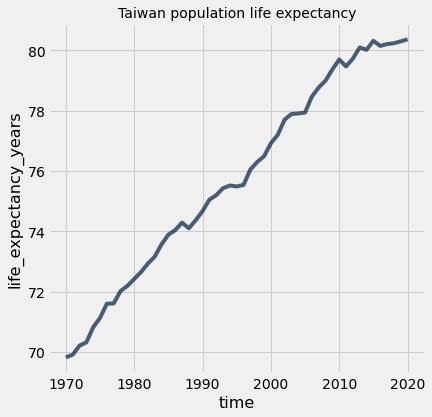

In [11]:
life_expectancy.where("geo", are.equal_to("twn")).where("time", are.above(1969)).drop(0).plot("time")
plots.title(label="Taiwan population life expectancy", fontsize=14)
plots.show()

The graph shows that people live longer. So if everything else remains the same, this will increase population growth

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

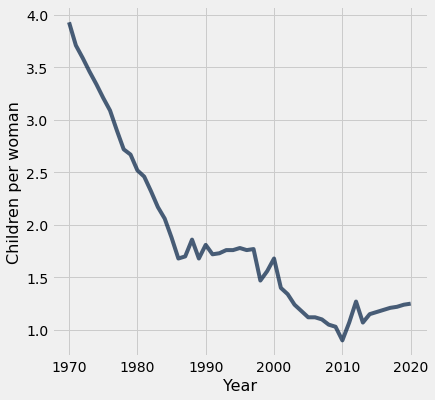

In [12]:
def fertility_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where("geo",are.equal_to(country)).where("time",are.above_or_equal_to(start)).column("children_per_woman_total_fertility")
    country_fertility_after_start = fertility.where("geo",are.equal_to(country)).where("time",are.above_or_equal_to(start)).column("time")
    cleaned_table = Table().with_columns(
        "Year",country_fertility_after_start,
        "Children per woman",country_fertility 
    )
    return cleaned_table
    

bangladesh_code = "twn"
fertility_time(bangladesh_code, 1970).plot(0, 1)

Based on Taiwan history, the [retreat of the government of the Republic of China to Taiwan](https://en.wikipedia.org/wiki/Retreat_of_the_government_of_the_Republic_of_China_to_Taiwan) in 1949, brought about 1.5 million immigrants. In addition, government later encouraged more births under the thought of preparing for war, so the population had skyrocketed. However, as the political situation changed, the possibility of the war gradually decreased, and the population problem began to receive attention. Therefore, a [family plan](https://zh.wikipedia.org/wiki/%E5%AE%B6%E5%BA%AD%E8%A8%88%E7%95%AB_(%E5%8F%B0%E7%81%A3)) was pushed by the government in 1964.

Since 1971, a very representative publicity slogan has been launched.
<img src="3321.jpg" alt="Taiwan family plan" style="height: 400px; width:300px;"/>
The translation is "Two children are just right, and one child is not too few"

This family plan has been maintained for 30 years and has achieved great results. Taiwan’s fertility rate ranks the second lowest in the world and is about to accelerate its entry into an aging society. Therefore, the modern government has switched to encouraging everyone to have more babies.

These are just some background for reference. The main point we can get is to explain the decline in population growth rate from the trends in fertility in the graph above

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

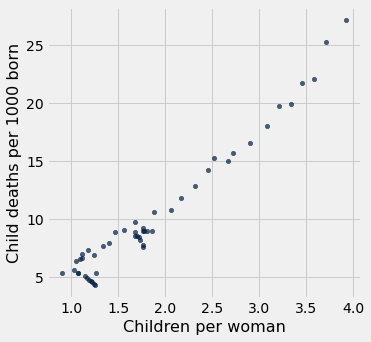

In [13]:
twn_fertility = fertility.where("geo",are.equal_to("twn")).where("time",are.above_or_equal_to(1970))
twn_child_mortality = child_mortality.where("geo",are.equal_to("twn")).where("time",are.above_or_equal_to(1970))
fertility_and_child_mortality = twn_fertility.join("time",twn_child_mortality)
post_1969_fertility_and_child_mortality = Table().with_columns(
    "Children per woman",fertility_and_child_mortality.column(2),
    "Child deaths per 1000 born",fertility_and_child_mortality.column(4)

)

post_1969_fertility_and_child_mortality.scatter('Children per woman', 'Child deaths per 1000 born') # You should *not* change this line.

The diagram show that reduced child mortality causes parents to choose to have fewer children.